# Homework Coding Week 1: Continuous-Time Consumption Euler Equation
In this notebook, we solve the continuous-time consumption Euler equation both analytically and numerically, and then compare the two solutions. The parameters are provided, and we'll use both integrating factor method (analytical solution) and finite difference method (numerical solution).

### Point 1: Solving the Consumption Euler Equation with the Integrating Factor Method

We want to solve the following differential equation:

$$
\frac{\dot{C_t}}{C_t} = \frac{r_t - \rho}{\theta}
$$

with the terminal condition $ C(T) = C_t $.

#### Step 1: Rewrite the Equation

Rewrite the equation in terms of $ \dot{C_t} $:

$$
\dot{C_t} = C_t \cdot \frac{r_t - \rho}{\theta}
$$

This is a first-order linear differential equation in $ C_t $. To use the integrating factor method, let's rewrite it in standard form:

$$
\dot{C_t} - \frac{r_t - \rho}{\theta} C_t = 0
$$

Where $ p(t) = -\frac{r_t - \rho}{\theta} $.

#### Step 2: Find the Integrating Factor

The integrating factor $ \mu(t) $ is given by:

$$
\mu(t) = e^{\int p(t) \, dt} = e^{-\int \frac{r_t - \rho}{\theta} \, dt}
$$

Let’s denote this integral as:

$$
\mu(t) = e^{-\frac{1}{\theta} \int (r_t - \rho) \, dt}
$$

#### Step 3: Multiply Through by the Integrating Factor

Multiplying both sides of the differential equation by $ \mu(t) $, we get:

$$
\mu(t) \dot{C_t} - \mu(t) \frac{r_t - \rho}{\theta} C_t = 0
$$

This simplifies to:

$$
\frac{d}{dt} \left( \mu(t) C_t \right) = 0
$$

#### Step 4: Integrate Both Sides

Since the derivative of $ \mu(t) C_t $ is zero, we can integrate with respect to $ t $:

$$
\mu(t) C_t = \text{constant}
$$

Let’s solve for $ C_t $:

$$
C_t = \frac{\text{constant}}{\mu(t)} = \text{constant} \cdot e^{\frac{1}{\theta} \int (r_t - \rho) \, dt}
$$


#### Step 5: Apply the Terminal Condition

Using the terminal condition $ C(T) = C_T $, we can determine the constant. Let’s rewrite the solution at any time $ t $ as:

$$
C(t) = C_T \cdot e^{\frac{1}{\theta} \int_T^t (r_s - \rho) \, ds} = C_T \cdot e^{\frac{1}{\theta} \int_t^T (\rho - r_s ) \, ds}
$$

where:
- $ C_T $ is the known terminal value of consumption.
- Note that when $t=T$, $C(t) = C_T$.

In [23]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters from the problem
CT = 2.0       # Terminal consumption
r0 = 0.05      # Initial interest rate
alpha = 0.01   # Growth rate of interest rate
theta = 2.0    # Inverse of the intertemporal elasticity of substitution
rho = 0.03     # Time discount factor
T = 10         # Terminal time
    

## Point 1 (continued): Analytical Solution Using Integrating Factor Method, Plot

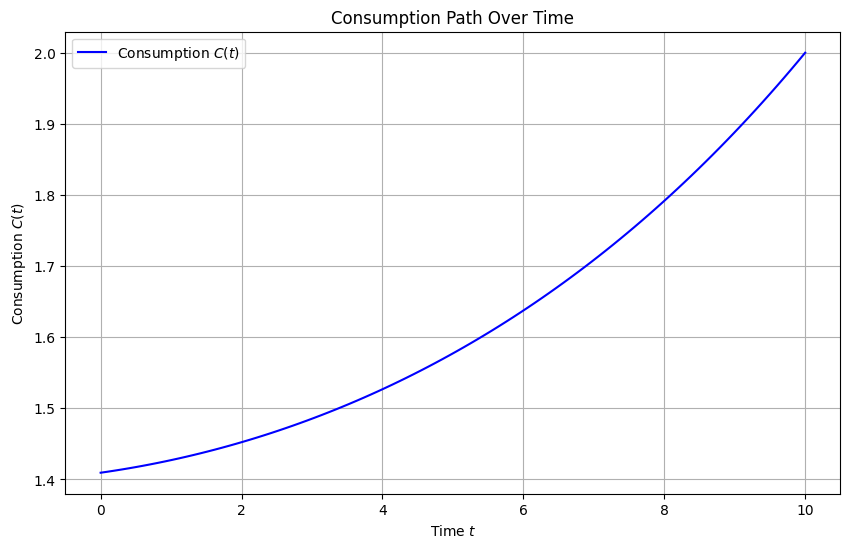

In [24]:
# Corrected integral calculation from t to T
def integral_rt_rho(t, T, r0, alpha, rho):
    # Integral of (r_s - rho) from t to T, where r_s = r0 + alpha * s
    return (rho - r0) * (T - t) - 0.5 * alpha * (T**2 - t**2)

# Analytical solution for C(t) with the corrected integral
def consumption(t):
    exponent = (1 / theta) * integral_rt_rho(t, T, r0, alpha, rho)
    return CT * np.exp(exponent)

# Time points to evaluate
time_grid = np.linspace(0, T, 100)
C_analytical = [consumption(t) for t in time_grid]

# Plotting the consumption path
plt.figure(figsize=(10, 6))
plt.plot(time_grid, C_analytical, label="Consumption $C(t)$", color="blue")
plt.xlabel("Time $t$")
plt.ylabel("Consumption $C(t)$")
plt.title("Consumption Path Over Time")
plt.legend()
plt.grid(True)
plt.show()


## Point 2: Numerical Solution Using Finite Difference Method with 100 Time Steps
Using finite differences, we discretize and compute the consumption path numerically. We compare this with the analytical solution.

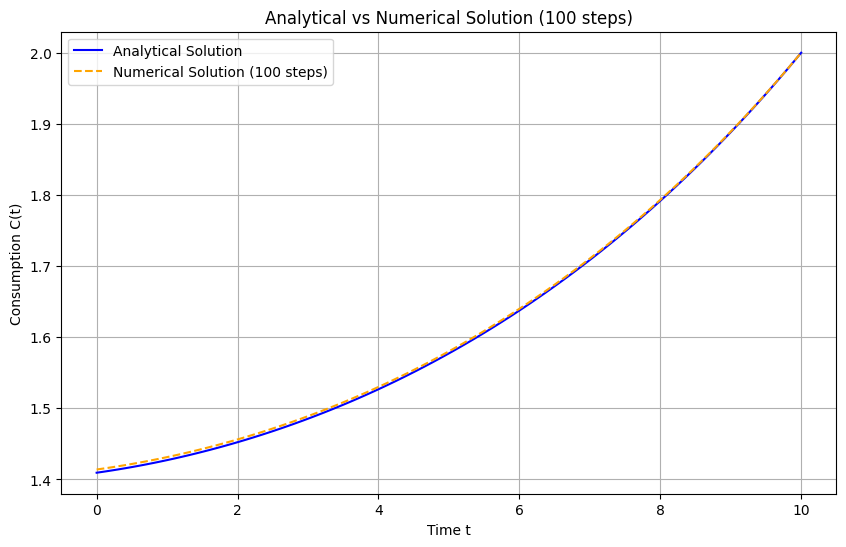

In [25]:
N=100

# Discretize time
time_points = np.linspace(0, T, N+1)
delta_t = T / N

# Initialize consumption array, setting C(T) = CT
consumption = np.zeros(N+1)
consumption[-1] = CT  # Set the terminal condition C(T) = CT

# Define interest rate function
def interest_rate(t):
    return r0 + alpha * t

# Backward finite difference method
for i in range(N-1, -1, -1):
    r_t = interest_rate(time_points[i])
    consumption[i] = consumption[i+1] / (1 + (delta_t / theta) * (r_t - rho))


# Plot the numerical and analytical solutions for 100 time steps
plt.figure(figsize=(10, 6))
plt.plot(time_grid, C_analytical, label="Analytical Solution", color="blue")
plt.plot(time_points, consumption, label="Numerical Solution (100 steps)", color="orange", linestyle="--")
plt.xlabel("Time t")
plt.ylabel("Consumption C(t)")
plt.title("Analytical vs Numerical Solution (100 steps)")
plt.legend()
plt.grid()
plt.show()
    

## Point 3: Numerical Solution Using Finite Difference Method with 10 Time Steps
We repeat the numerical solution with 10 time steps to see the effects of coarser discretization.

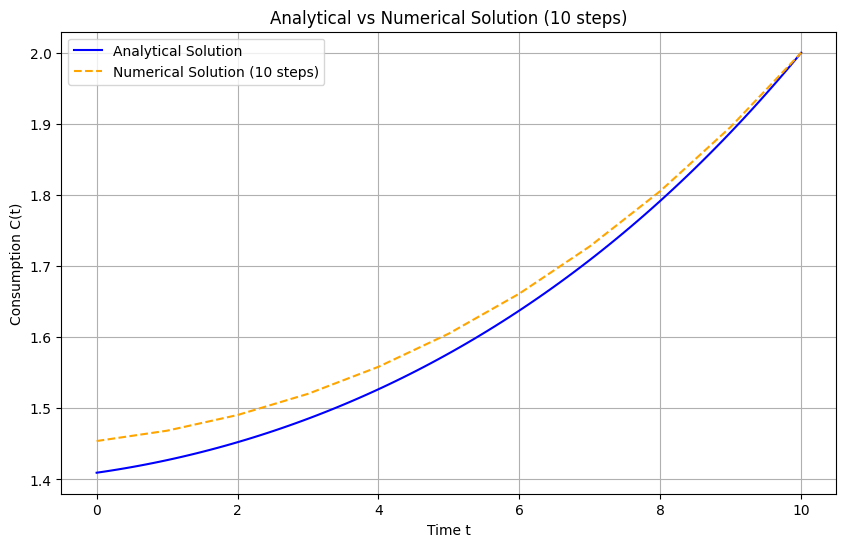

In [26]:
N=10

# Discretize time
time_points = np.linspace(0, T, N+1)
delta_t = T / N

# Initialize consumption array, setting C(T) = CT
consumption = np.zeros(N+1)
consumption[-1] = CT  # Set the terminal condition C(T) = CT

# Define interest rate function
def interest_rate(t):
    return r0 + alpha * t

# Backward finite difference method
for i in range(N-1, -1, -1):
    r_t = interest_rate(time_points[i])
    consumption[i] = consumption[i+1] / (1 + (delta_t / theta) * (r_t - rho))


# Plot the numerical and analytical solutions for 100 time steps
plt.figure(figsize=(10, 6))
plt.plot(time_grid, C_analytical, label="Analytical Solution", color="blue")
plt.plot(time_points, consumption, label="Numerical Solution (10 steps)", color="orange", linestyle="--")
plt.xlabel("Time t")
plt.ylabel("Consumption C(t)")
plt.title("Analytical vs Numerical Solution (10 steps)")
plt.legend()
plt.grid()
plt.show()
    

## Point 4: Comparison and Discussion
As observed, the numerical solution with 100 time steps closely follows the analytical solution. With only 10 time steps, there's a noticeable deviation, especially near the start. This occurs due to the larger approximation errors in the coarser discretization. Generally, increasing the number of time steps improves the accuracy of the numerical solution.

Note also that since the interest rate exceeds the discount factor, consumption is increasing over time, as there is an incentive to save and consume later.